In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import multiprocessing
import matplotlib.pyplot as plt
import math
from decimal import Decimal
import typing

#### Problem 1.3.2

In [3]:
def simulation(terms: int, dist):
    coefficients = dist.rvs(size=terms)
    roots = np.roots(coefficients)
    return np.iscomplex(roots).sum() > 0

In [4]:
def simulation_many(terms: int, iterations: int, dist):
    results = Parallel(n_jobs=multiprocessing.cpu_count())(delayed(simulation)(terms, dist) for i in range(0, iterations))
    return np.array(results)

In [5]:
iterations = [10, 100, 800]
min_terms, max_terms = (2, 10)
results = pd.DataFrame(index=pd.Series(range(min_terms, max_terms+1), name="Number of terms"),
                       columns=pd.MultiIndex.from_product([["Uniform", "Normal"], iterations], names=["Distribution", "Number of iterations"]))

results["Uniform"] = np.array([[simulation_many(terms, i, stats.uniform()).sum()/i for terms in range(min_terms, max_terms+1)] for i in iterations]).transpose()
results["Normal"] = np.array([[simulation_many(terms, i, stats.norm()).sum()/i for terms in range(min_terms, max_terms+1)] for i in iterations]).transpose()
results

<div>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th>Distribution</th>
      <th colspan="3" halign="left">Uniform</th>
      <th colspan="3" halign="left">Normal</th>
    </tr>
    <tr>
      <th>Number of iterations</th>
      <th>10</th>
      <th>100</th>
      <th>800</th>
      <th>10</th>
      <th>100</th>
      <th>800</th>
    </tr>
    <tr>
      <th>Number of terms</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>0.0</td>
      <td>0.00</td>
      <td>0.00000</td>
      <td>0.0</td>
      <td>0.00</td>
      <td>0.00000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.9</td>
      <td>0.81</td>
      <td>0.76625</td>
      <td>0.1</td>
      <td>0.36</td>
      <td>0.35375</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1.0</td>
      <td>0.98</td>
      <td>0.98375</td>
      <td>0.1</td>
      <td>0.69</td>
      <td>0.75000</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1.0</td>
      <td>1.00</td>
      <td>1.00000</td>
      <td>1.0</td>
      <td>0.89</td>
      <td>0.91250</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1.0</td>
      <td>1.00</td>
      <td>1.00000</td>
      <td>1.0</td>
      <td>1.00</td>
      <td>0.99750</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1.0</td>
      <td>1.00</td>
      <td>1.00000</td>
      <td>1.0</td>
      <td>1.00</td>
      <td>1.00000</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1.0</td>
      <td>1.00</td>
      <td>1.00000</td>
      <td>1.0</td>
      <td>1.00</td>
      <td>1.00000</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1.0</td>
      <td>1.00</td>
      <td>1.00000</td>
      <td>1.0</td>
      <td>1.00</td>
      <td>1.00000</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1.0</td>
      <td>1.00</td>
      <td>1.00000</td>
      <td>1.0</td>
      <td>1.00</td>
      <td>1.00000</td>
    </tr>
  </tbody>
</table>
</div>

#### Problem 1.5.1

Given that 
$$errC(h) = \frac{M_3h^2}{6} + 2\frac{\delta}{h}$$ 
we have
$$h_{opt} = \frac{6\sigma}{M_3}$$
therefore, the error is:
$$errC(h_{opt}) = \frac{6\sigma^2}{M_3} + 3M_3$$
so the generalized $derivative$ function will be as follows:

In [6]:
def derivative(func, a, delta=None, M2=1, M3=1):
    if delta is None:
        delta = np.spacing(1)
    h_opt_Dh = 2*np.sqrt(delta/M2)
    h_opt_Ch = 6*delta/M3
    error_Dh = 2*np.sqrt(delta*M2)
    error_Ch = 6*np.power(delta, 2)/M3 + 3*M3
    if error_Dh <= error_Ch:
        return (func(a+h_opt_Dh)-func(a))/h_opt_Dh
    else:
        return (func(a+h_opt_Ch) - func(a-h_opt_Ch))/(2*h_opt_Ch)

The derivative of $sin$ at 0.5 should be close to 0:

In [7]:
derivative(math.sin, 0.5*np.pi)

-1.4901161193847656e-08

#### Problem 1.6.1

In [2]:
def dot3(x: typing.List, y: typing.List):
    if len(x) != len(y):
        raise ValueError("Invalid arguments")
    try:
        [(int(tup[0]), int(tup[1])) for tup in zip(x, y)]
    except ValueError:
        raise ValueError("Invalid arguments")
    x_dec, y_dec = zip(*[(Decimal(nums[0]), Decimal(nums[1])) for nums in zip(x, y)])
    return float((np.array(x_dec) * np.array(y_dec)).sum())

In [3]:
def trial(size: int):
    vector1 = np.random.uniform(0, 1, size)
    vector2 = np.random.uniform(0, 1, size)
    dot3_res = dot3(vector1, vector2)
    return (vector1*vector2).sum() - dot3_res

results = [trial(5) for i in range(0, 100)]

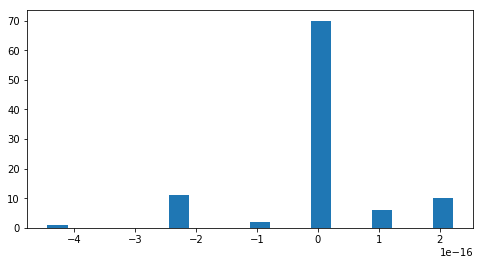

In [4]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
ax.hist(x=results, bins=20)
fig